In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the stock data into a pandas dataframe
df = pd.read_csv('TSLA.csv')

In [3]:
# Define a function to identify the morning star pattern
def is_morning_star(row):
    # Check that the pattern exists
    if len(df) < 3 or row.name < 2:
        return False
    # Check that the pattern is a morning star
    prev_close = df.loc[row.name - 1, 'Close']
    prev2_close = df.loc[row.name - 2, 'Close']
    prev_open = df.loc[row.name - 1, 'Open']
    prev2_open = df.loc[row.name - 2, 'Open']
    curr_close = row['Close']
    curr_open = row['Open']
    if (prev_close < prev2_close and prev_close < prev2_open and
            curr_close > prev_close and curr_open < prev_close and
            curr_open > prev_open):
        return True
    else:
        return False

# Identify the morning star patterns in the data
morning_star_mask = df.apply(is_morning_star, axis=1)
morning_star_dates = df[morning_star_mask]['Date']

In [4]:
# Print out the dates of the morning star patterns
print('Dates of morning star patterns:')
for date in morning_star_dates:
    print(date)

Dates of morning star patterns:
2015-09-11
2016-05-11
2016-06-27
2018-05-04
2019-07-29
2021-12-15


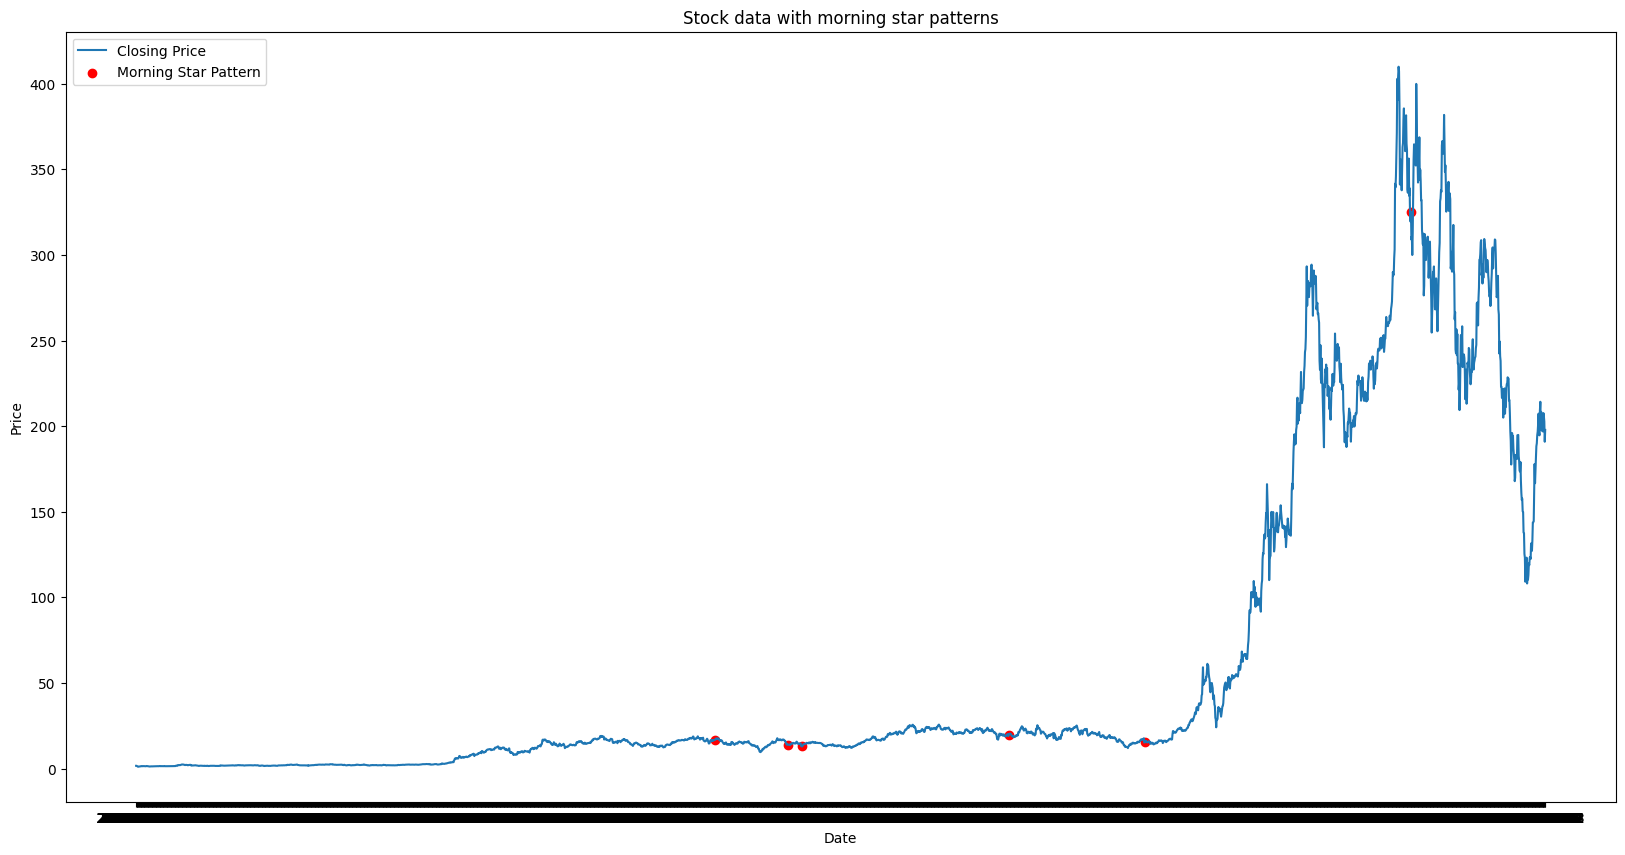

In [5]:
# Plot the stock data with the morning star patterns highlighted
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['Date'], df['Close'], label='Closing Price')
ax.scatter(morning_star_dates, df[morning_star_mask]['Close'], color='r', label='Morning Star Pattern')
ax.set_title('Stock data with morning star patterns')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()